<h1 align="center">Zewail University of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2018)</h2>
<h2 align="center">Lab 9: PCA</h3>
<h3 align="center">15/11/2018</h3>

## <font color="#00cccc">PCA<font/>
### Run PCA Demo

## <font color = "#af00af"> What does PCA do? <font/>

### 1) PCA learns a k-dimensional subspace given a d-dimensional data
### 2) The new subspace is represented by k basis vectors
### 3) The k basis vectors are orthonormal, and they try to capture as much variance in the original data as possible
### 4) The 1st basis vector (1st principal component) points in the direction of the data with maximum variance, and so forth
### $$ X \approx ZW $$
### $$ (nxd) \approx (nxk)(kxd) $$

### The basis vectors are the rows of W
### The representations in the new basis are the rows of Z

<img src="PCA_Linear_Combination.PNG">
source: https://ubc-cs.github.io/cpsc340/lectures/L24.pdf
### Instead of using 784-dimensional images (28x28), we can use the 7-dimensional z to represent them (for "3", the z = [1,1,1,1,1,0,0])

## <font color = "#af00af"> How to calculate principal components? <font/>

### 1) Subtract the mean of the data (and preferably standardize the data)
### 2) Calculate the covariance matrix
### $$ \Sigma = \frac{1}{n-1}(X-\mu)^T(X-\mu) = \frac{1}{n-1}X^T X\ (as\ we\ centered\ the\ data)$$ 
### 3) Calculate the eigenvalues and the eigenvectors of the covariance matrix
### 4) Construct the transformation matrix W, with the rows being the eigenvectors that correspond to the k biggest eigenvalues, these eigenvectors represent your new basis vectors

### Alternatively, PCA can be calculated using SVD (which is more common)
### See here for more details on SVD: https://www.youtube.com/watch?v=daHVmoOrLrI

## Load IRIS Dataset

##### Attributes:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

We will just use two features for easier visualization; sepal length and width.

##### class: 
* Iris Setosa 
* Iris Versicolour 
* Iris Virginica

<img src="Lab9_petal_sepal.png">
source: https://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png.html

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import iris dataset
iris = datasets.load_iris()

# We would use only the first two features
X = iris.data
y = iris.target

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 0)

del X, y
print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples")

training set size: 112 samples 
test set size: 38 samples


In [2]:
from numpy.linalg import svd
import numpy as np

## Standardize Data

In [3]:
mu = np.mean(X_train,axis=0)
std = np.std(X_train, axis=0)
X_train_std = (X_train-mu)/std
del X_train

## <font color = "#af00af"> Why do we need to standardize data? <font/>

## Apply PCA to Reduce Features Dimensions From 4 to 2

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
new_projected_data = pca.fit_transform(X_train_std)

In [5]:
from lab9_functions import plot_iris_data
plot_iris_data(new_projected_data,y_train)

<Figure size 1600x600 with 1 Axes>

## <font color = "#af00af"> Which features do these two components represent? <font/>

## <font color = "#af00af"> How much information did we lose in the previous operation? <font/>

In [6]:
pca.explained_variance_ratio_

array([0.72212663, 0.24133062])

## <font color = "#af00af"> What are the applications of PCA? <font/>

### Supervised Learning (reduce features size for computational purposes, avoid overfitting, etc)
### Visualization
### Dimensionality Reduction

## <font color = "#af00af"> When does PCA fails? <font/>

<img src="PCA_fails.png">
source: A Tutorial on Principal Component Analysis, Jonathon Shlens, https://arxiv.org/pdf/1404.1100.pdf

## <font color = "#ff0000"> Exercise: <font/>

In [7]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

X,y = load_digits(return_X_y=True)

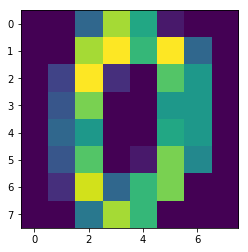

In [21]:
plt.imshow(X[0,:].reshape(8,8), interpolation='nearest')
plt.show()

### Split Data to Training and Testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 0)

### Center Data (no need to divide by standard deviation as they are all on the same scale)

In [20]:
mu = np.mean(X_train,axis=0)
X_train_centered = X_train - mu
X_test_centered = X_test - mu

### Use Sklearn LinearSVC classifier to classify data, and print the training and testing accuracy

In [11]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)
clf.fit(X_train_centered, y_train) 
print(f"Training accuracy: {clf.score(X_train_centered,y_train)*100:.2f}%")
print(f"Testing accuracy: {clf.score(X_test_centered,y_test)*100:.2f}%")

Training accuracy: 99.33%
Testing accuracy: 93.78%


### Apply PCA using two components

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
projected_train_data = pca.fit_transform(X_train_centered)
projected_test_data = pca.transform(X_test_centered)

### Plot Data (with different colors for different numbers)

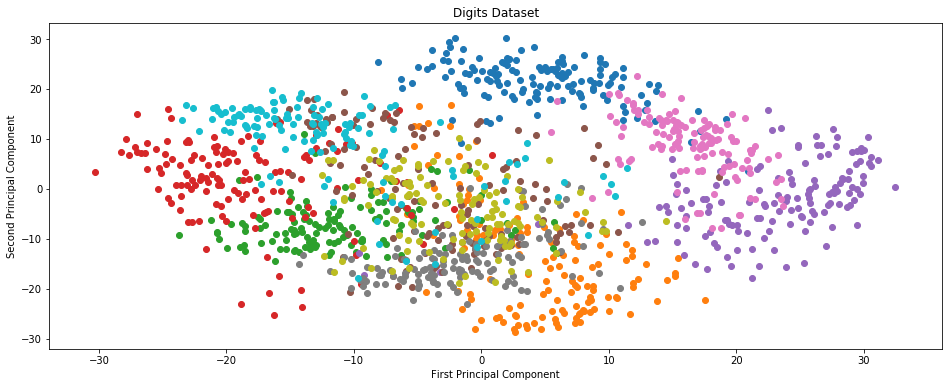

In [15]:
f, ax = plt.subplots(1, 1)
for i in range(0,10):
    ax.scatter(projected_train_data[y_train == i, 0], projected_train_data[y_train == i, 1])
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
f.set_size_inches(16, 6)
ax.set_title("Digits Dataset")
plt.show()

### Use Sklearn LinearSVC classifier to classify the new projected data, and print the training and testing accuracy

In [16]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)
clf.fit(projected_train_data, y_train) 
print(f"Training accuracy: {clf.score(projected_train_data,y_train)*100:.2f}%")
print(f"Testing accuracy: {clf.score(projected_test_data,y_test)*100:.2f}%")

Training accuracy: 51.00%
Testing accuracy: 44.22%


### Apply PCA such that 90% of the variance in the data is reserved

In [17]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
projected_train_data = pca.fit_transform(X_train_centered)
projected_test_data = pca.transform(X_test_centered)

### How many components did you use?

### Use Sklearn LinearSVC classifier to classify the new projected data, and print the training and testing accuracy

In [19]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)
clf.fit(projected_train_data, y_train) 
print(f"Training accuracy: {clf.score(projected_train_data,y_train)*100:.2f}%")
print(f"Testing accuracy: {clf.score(projected_test_data,y_test)*100:.2f}%")

Training accuracy: 95.92%
Testing accuracy: 94.44%
